# Transaction Monitoring

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from transaction import TransactionData

## 1. File processing

In [3]:
df = TransactionData.parse_csv("./data/sample_orders_2.csv")

DransactionData object was created successfully.


## 2. Basic analysis

### 2.1. Total number of orders

In [4]:
print(f'Number of orders: {len(df)}')

Number of orders: 1000


### 2.2. Number of unique clients

In [5]:
unq = df['user_id'].nunique()
print(f"Number of unique users: {unq}")

Number of unique users: 100


### 2.3. Average order amount

In [6]:
df['order_amount'] = df['quantity']*df['unit_price']
avg_order_amount = df['order_amount'].mean()
print(f"Average order amount: {avg_order_amount.round(2)}")

Average order amount: 3078.8


### 2.4. Average number of orders per day

In [7]:
df['date'] = df['created_at'].dt.date
tr_per_day = df.groupby(df['date']).size().reset_index(name='number_of_orders')
tr_per_day

,date,number_of_orders
0,2023-01-02,1
1,2023-01-03,3
2,2023-01-04,1
3,2023-01-05,5
4,2023-01-06,3
...,...,...
329,2023-12-28,3
330,2023-12-29,4
331,2023-12-30,6
332,2023-12-31,4


In [8]:
avg_tr_per_day = tr_per_day['number_of_orders'].mean()
avg_dict = {'Average number of orders per day': avg_tr_per_day, 'Rounded up to integer': np.ceil(avg_tr_per_day).astype(int), 'Rounded down to integer': np.floor(avg_tr_per_day).astype(int), 'Rounded up to 3rd decimal':np.ceil(avg_tr_per_day*1000)/1000, 'Rounded down to 3rd decimal':np.floor(avg_tr_per_day*1000)/1000}
avg_dict

{'Average number of orders per day': 2.9940119760479043,
 'Rounded up to integer': 3,
 'Rounded down to integer': 2,
 'Rounded up to 3rd decimal': 2.995,
 'Rounded down to 3rd decimal': 2.994}

### 2.5. Bonus

In [9]:
df.info()

<class 'transaction.TransactionData'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    1000 non-null   datetime64[ns]
 1   user_id       1000 non-null   object        
 2   order_type    1000 non-null   object        
 3   order_id      1000 non-null   object        
 4   isin          1000 non-null   object        
 5   quantity      1000 non-null   int64         
 6   unit_price    1000 non-null   float64       
 7   order_amount  1000 non-null   float64       
 8   date          1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.4+ KB


In [10]:
df.head(5)

,created_at,user_id,order_type,order_id,isin,quantity,unit_price,order_amount,date
0,2024-03-20 00:59:03,user|57f4lb88pr59ukwzm8gpp2c5,BUY,692070b3-9c05-438c-9c59-a58fd5650fd3,LU59478382904,23,73.27,1685.21,2024-03-20
1,2023-01-02 01:59:03,user|57f4lb88pr59ukwzm8gpp2c5,SELL,692070b3-9c05-438c-9c59-a58fd5650ld3,LU59478382904,25,72.27,1806.75,2023-01-02
2,2023-01-03 12:37:34,user|2vo2lu6gm28yawaihjf9qius,SELL,d2e27f40-f526-441e-8d6f-3ae2c68d21f9,LU86746320721,85,46.60,3961.00,2023-01-03
3,2023-01-03 13:37:34,user|2vo2lu6gm28yawaihjf9qius,BUY,d2e27f40-f526-441e-8d6f-3ae2c68d01f9,LU86746320721,82,49.60,4067.20,2023-01-03
4,2023-01-03 22:44:59,user|fuzwha641i5vo3nefdas7bvs,BUY,2241ec88-dc11-45af-a472-33d0b094e0d6,LU69875763063,56,72.84,4079.04,2023-01-03


In [11]:
dup = df[df.duplicated(keep=False)]
dup

,created_at,user_id,order_type,order_id,isin,quantity,unit_price,order_amount,date


In [12]:
print("Order type has only values: ", df['order_type'].unique())

Order type has only values:  ['BUY' 'SELL']


In [13]:
df.get_future_transactions()

,created_at,user_id,order_type,order_id,isin,quantity,unit_price,order_amount,date
0,2024-03-20 00:59:03,user|57f4lb88pr59ukwzm8gpp2c5,BUY,692070b3-9c05-438c-9c59-a58fd5650fd3,LU59478382904,23,73.27,1685.21,2024-03-20


## 3. Advanced analysis

### 3.1. Standart deviation of the order amount

In [14]:
print(f"Average order amount: {round(avg_order_amount,2)}")

Average order amount: 3078.8


In [15]:
dev_order_amount = df['order_amount'].std()
print(f"Standart deviation of the order amount: {round(dev_order_amount,2)}")

Standart deviation of the order amount: 2216.88


### 3.2. Total value of orders per client

#### 3.2.1. Turnover

In [16]:
client_abs_value = df.groupby(['user_id'])['order_amount'].sum().reset_index(name='turnover')
client_abs_value

,user_id,turnover
0,user|05bz049zxtrqv36du1t15c8a,33692.51
1,user|0somdbu7edlcp5itqndm0d6m,19659.10
2,user|1da4616q4vmfz6kks9k98z5p,49047.76
3,user|1dups1jc996hp9mnntxkxwdj,39277.88
4,user|1q6otxc00dwwkgs32tc3lvf2,22126.44
...,...,...
95,user|yyyo77vf2js1y0jm1erus575,4395.22
96,user|z5vqpdf31l1crdhbyifj86f9,275094.72
97,user|z7j9w1hnqox9krm9yjw6tkfg,11250.47
98,user|zxx006cxqcc27iybrrneyouq,14515.74


#### 3.2.2. Balance (debit - credit)

In [17]:
pivot_user = df.pivot_table(index='user_id', columns='order_type', values='order_amount', aggfunc='sum', fill_value=0)
pivot_user['balance']=pivot_user['BUY']-pivot_user['SELL']
pivot_user

order_type,BUY,SELL,balance
user_id,,,
user|05bz049zxtrqv36du1t15c8a,33692.51,0.00,33692.51
user|0somdbu7edlcp5itqndm0d6m,18144.50,1514.60,16629.90
user|1da4616q4vmfz6kks9k98z5p,45407.70,3640.06,41767.64
user|1dups1jc996hp9mnntxkxwdj,34222.93,5054.95,29167.98
user|1q6otxc00dwwkgs32tc3lvf2,15876.23,6250.21,9626.02
...,...,...,...
user|yyyo77vf2js1y0jm1erus575,4395.22,0.00,4395.22
user|z5vqpdf31l1crdhbyifj86f9,243142.39,31952.33,211190.06
user|z7j9w1hnqox9krm9yjw6tkfg,7737.27,3513.20,4224.07


### 3.3. Bonus

#### 3.3.1. Additional info about dataframe

In [18]:
df.describe()

,created_at,quantity,unit_price,order_amount
count,1000,1000.000000,1000.000000,1000.00000
mean,2023-07-01 11:33:20.694999808,50.401000,60.381350,3078.79807
min,2023-01-02 01:59:03,1.000000,20.090000,46.98000
25%,2023-03-25 23:30:05,26.000000,40.672500,1342.38750
50%,2023-06-28 04:13:38.500000,49.000000,61.640000,2518.50500
75%,2023-10-02 20:07:51.500000,74.000000,80.405000,4381.99000
max,2024-03-20 00:59:03,100.000000,99.990000,9899.01000
std,NaN,28.219329,22.872355,2216.87644


#### 3.3.2. Seasonal change of total orders value (transaction activity)

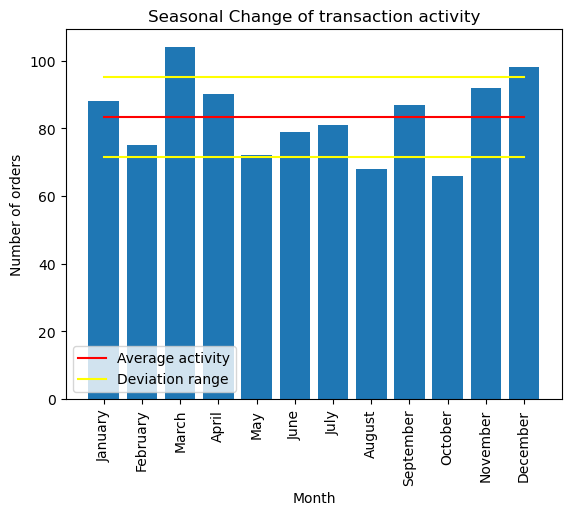

In [19]:
df.plot_tr_activity()

#### 3.3.3. Total value of orders per day

In [20]:
per_date = df.groupby('date')['order_amount'].sum().reset_index(name='turnover')
per_date

,date,turnover
0,2023-01-02,1806.75
1,2023-01-03,12107.24
2,2023-01-04,6468.10
3,2023-01-05,7546.18
4,2023-01-06,8506.70
...,...,...
329,2023-12-28,7904.52
330,2023-12-29,16766.88
331,2023-12-30,19353.11
332,2023-12-31,8045.56


#### 3.3.4. Total value of orders per fund (balance)

In [21]:
pivot_isin = df.pivot_table(index='isin', columns='order_type', values='order_amount', aggfunc='sum', fill_value=0).rename_axis(None, axis=1)
pivot_isin['balance']=pivot_isin['BUY']-pivot_isin['SELL']
pivot_isin

,BUY,SELL,balance
isin,,,
LU01416244305,19810.87,0.00,19810.87
LU01917690138,14545.13,1514.60,13030.53
LU02052615892,21391.72,4267.62,17124.10
LU03543140768,18497.46,8447.67,10049.79
LU03614501122,4258.96,1712.16,2546.80
...,...,...,...
LU96462479751,10889.40,1438.08,9451.32
LU97005759224,2483.74,0.00,2483.74
LU97501947824,19508.24,9122.10,10386.14


## 4. Suspicious Transactions

### 4.1. Order value > n

In [22]:
df.susp_order_amount(9500)

Suspicious activity!


,created_at,user_id,order_id,order_amount
598,2023-08-07 18:18:32,user|cw5oxh3duvvd3l8xw9z0hwlc,c7f21d58-426d-4f64-aea4-275a9fa8e7b3,9629.48
666,2023-09-04 03:41:44,user|omf8p6app6njuii2z0pdc0hk,f0108d9f-9088-43f4-bba3-dc779b2bcba0,9899.01
734,2023-09-28 15:50:21,user|z5vqpdf31l1crdhbyifj86f9,7c1d2c0a-f443-425f-9f68-70b74c896cf0,9714.00
815,2023-11-02 04:45:12,user|fuzwha641i5vo3nefdas7bvs,a998bc71-dc9b-428b-b023-23112558ef31,9524.16


### 4.2. High frequency orders (threshold in min)

In [23]:
df.get_hf_transactions(180)

,user_id,created_at,order_id,order_amount
85,user|2vo2lu6gm28yawaihjf9qius,2023-01-03 12:37:34,d2e27f40-f526-441e-8d6f-3ae2c68d21f9,3961.00
86,user|2vo2lu6gm28yawaihjf9qius,2023-01-03 13:37:34,d2e27f40-f526-441e-8d6f-3ae2c68d01f9,4067.20
563,user|n4jjtiirlddz2b2lryq8lucl,2023-10-14 10:11:14,1e35eb82-7c8e-43be-afdb-f7be388cff77,1212.56
564,user|n4jjtiirlddz2b2lryq8lucl,2023-10-14 12:27:15,d437f8e7-a4db-4e74-8a81-139bbea0bd18,2331.68
564,user|n4jjtiirlddz2b2lryq8lucl,2023-10-14 12:27:15,d437f8e7-a4db-4e74-8a81-139bbea0bd18,2331.68
565,user|n4jjtiirlddz2b2lryq8lucl,2023-10-14 12:30:03,44e4772e-71c5-4d71-bcc9-6b502d1e4af4,2187.64


### 4.3. Bonus: Change of the fund's turnover

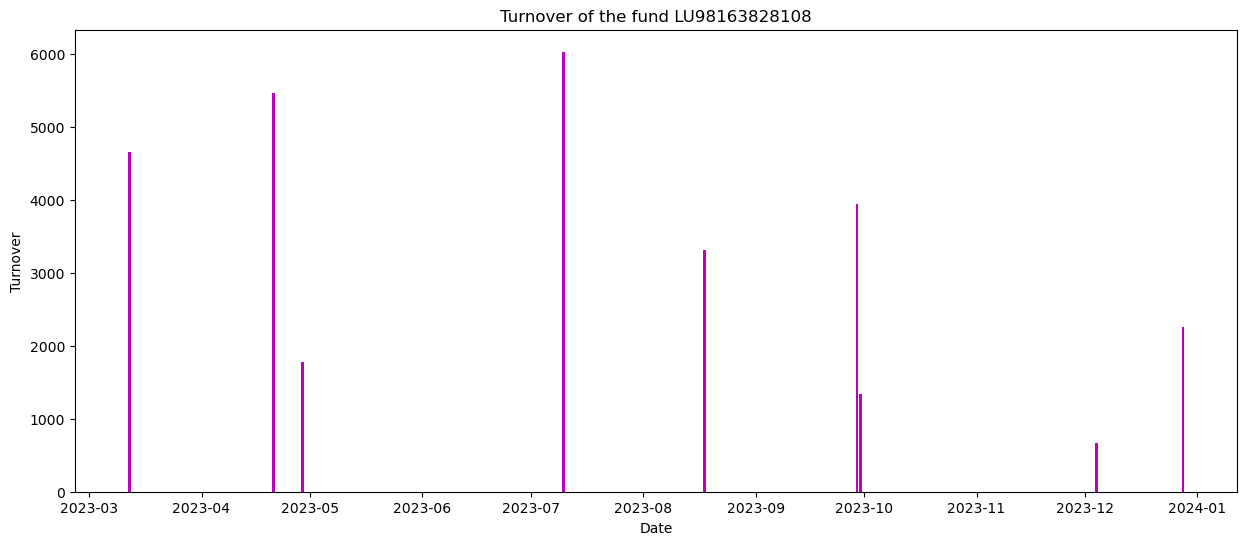

In [24]:
df.plot_fund_turnover('LU98163828108')

## 5. Suspicious Transactions (Advanced)

### 5.1. Rapid increase in account activity

#### 5.1.1. Change of downtime (pattern)

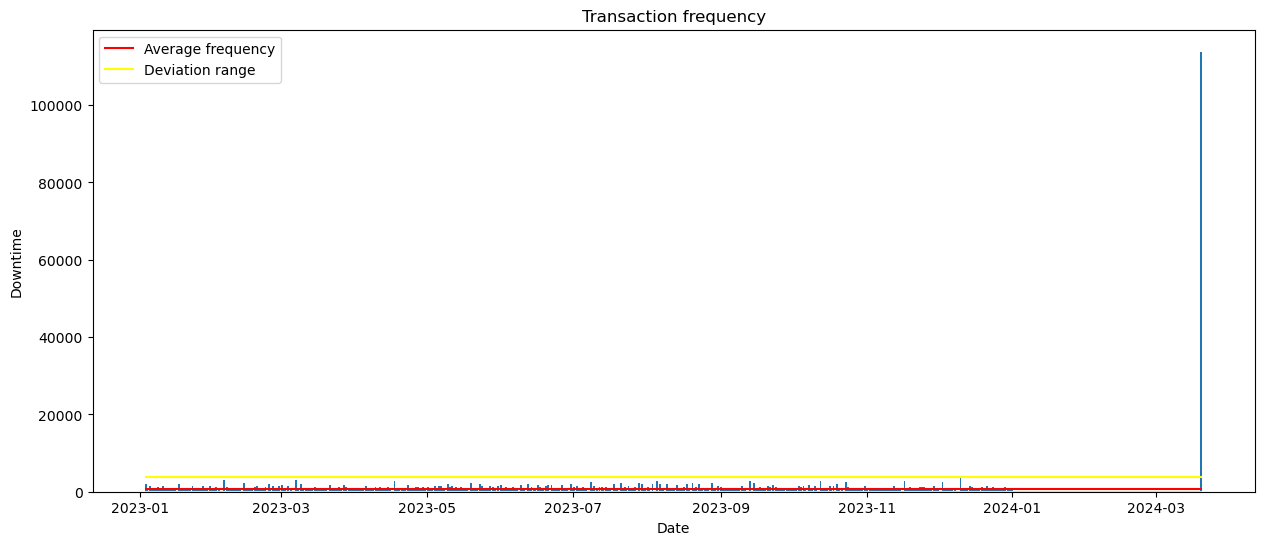

In [25]:
df.plot_activity_increase(0.9)

#### 5.1.2. Suspicious decrease of downtime (rapid increase in activity)

In [26]:
df.activity_increase_susp(0.845)

,index,created_at,user_id,order_type,order_id,isin,quantity,unit_price,order_amount,date,time_diff
85,2,2023-01-03 12:37:34,user|2vo2lu6gm28yawaihjf9qius,SELL,d2e27f40-f526-441e-8d6f-3ae2c68d21f9,LU86746320721,85,46.60,3961.00,2023-01-03,0.000000
86,3,2023-01-03 13:37:34,user|2vo2lu6gm28yawaihjf9qius,BUY,d2e27f40-f526-441e-8d6f-3ae2c68d01f9,LU86746320721,82,49.60,4067.20,2023-01-03,60.000000
339,598,2023-08-07 18:18:32,user|cw5oxh3duvvd3l8xw9z0hwlc,BUY,c7f21d58-426d-4f64-aea4-275a9fa8e7b3,LU66084718088,98,98.26,9629.48,2023-08-07,40676.033333
340,599,2023-08-07 22:00:30,user|cw5oxh3duvvd3l8xw9z0hwlc,BUY,a4aa1204-633a-43d3-a94f-b55f3c961dd9,LU90362253270,95,95.05,9029.75,2023-08-07,221.966667
563,772,2023-10-14 10:11:14,user|n4jjtiirlddz2b2lryq8lucl,BUY,1e35eb82-7c8e-43be-afdb-f7be388cff77,LU94275438033,46,26.36,1212.56,2023-10-14,17144.133333
564,773,2023-10-14 12:27:15,user|n4jjtiirlddz2b2lryq8lucl,BUY,d437f8e7-a4db-4e74-8a81-139bbea0bd18,LU50975575921,52,44.84,2331.68,2023-10-14,136.016667
564,773,2023-10-14 12:27:15,user|n4jjtiirlddz2b2lryq8lucl,BUY,d437f8e7-a4db-4e74-8a81-139bbea0bd18,LU50975575921,52,44.84,2331.68,2023-10-14,136.016667
565,786,2023-10-14 12:30:03,user|n4jjtiirlddz2b2lryq8lucl,BUY,44e4772e-71c5-4d71-bcc9-6b502d1e4af4,LU36110821488,26,84.14,2187.64,2023-10-14,2.800000
712,899,2023-11-30 10:57:35,user|t8symjfcadilby7qjb2xght6,BUY,34eec309-a4e4-43d4-85a1-dd359be8c7e5,LU12598964162,46,78.23,3598.58,2023-11-30,47678.966667
713,900,2023-11-30 14:35:38,user|t8symjfcadilby7qjb2xght6,BUY,0dd44e50-3752-4690-b95e-0ab98e01036d,LU19957116620,66,22.04,1454.64,2023-11-30,218.050000


#### 5.1.3. How to choose deviation factor (width of the normal range for downtime)

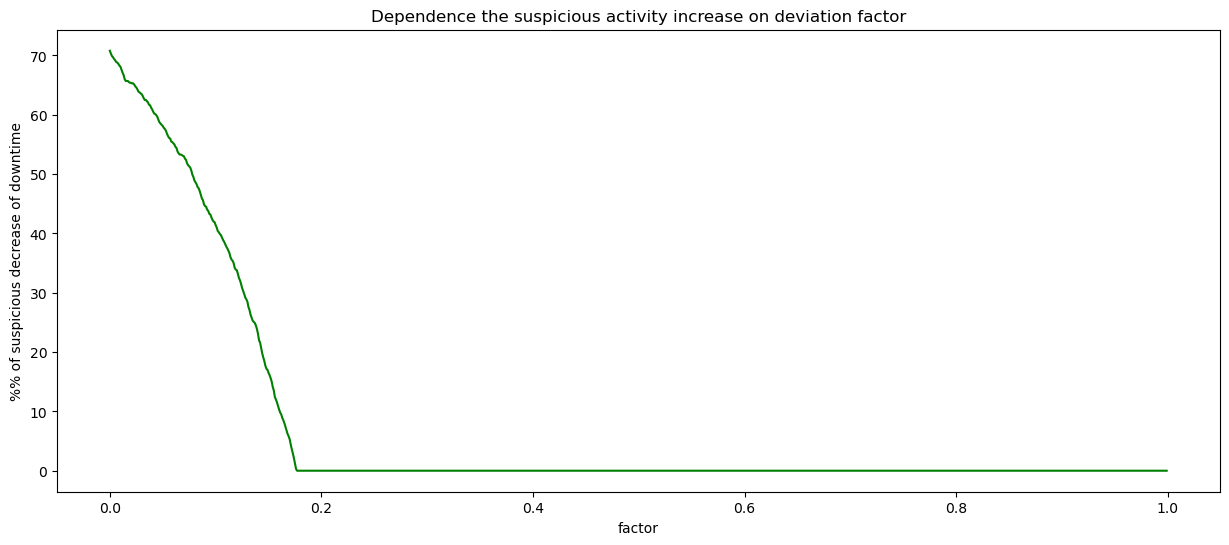

In [27]:
df.plot_dev_factor_act_increase()

### 5.2. Suspicious value of orders

#### 5.2.1. Change of total value of orders (pattern)

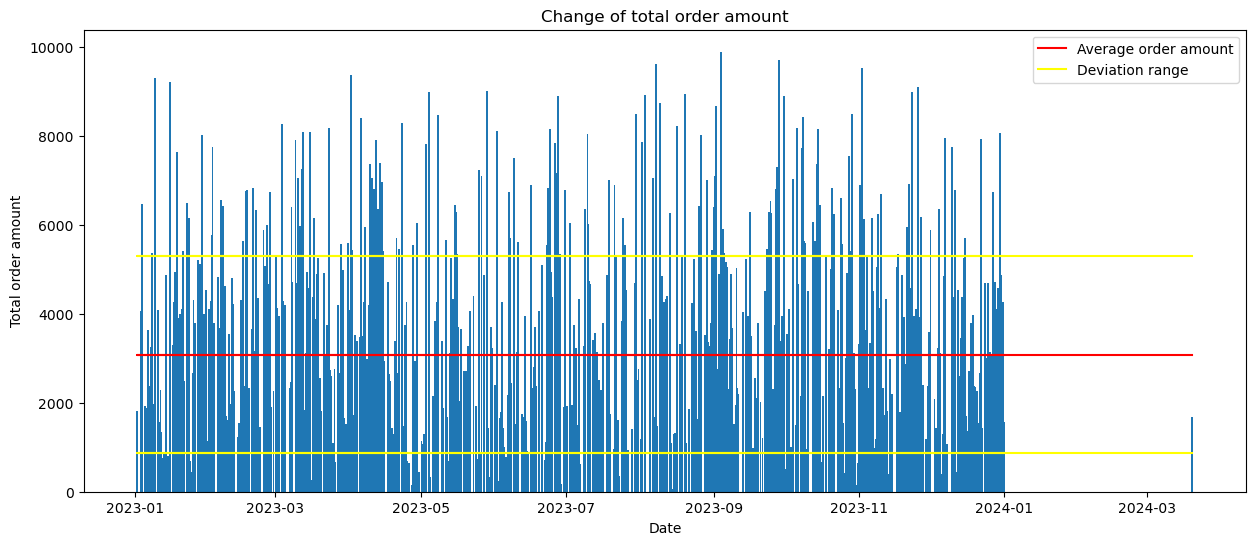

In [28]:
df.plot_order_amount(1)

#### 5.2.2. Suspiciously high order amount

In [29]:
df.order_amount_susp(3)

,created_at,user_id,order_id,order_amount
666,2023-09-04 03:41:44,user|omf8p6app6njuii2z0pdc0hk,f0108d9f-9088-43f4-bba3-dc779b2bcba0,9899.01


#### 5.2.3. How to choose deviation factor (width of the normal range for order amount)

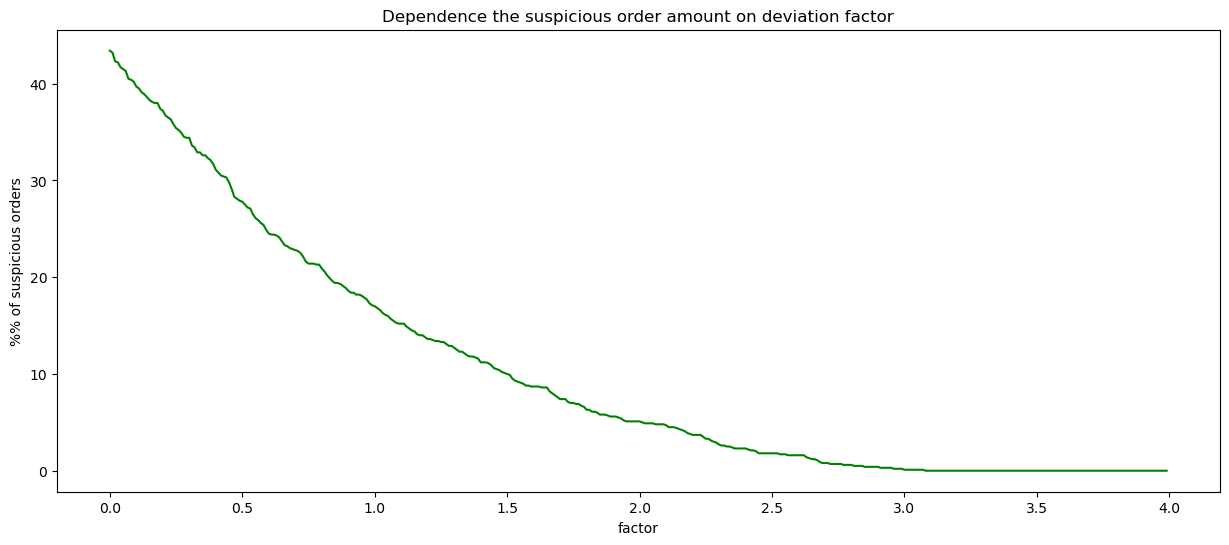

In [30]:
df.plot_dev_factor_order_amount()

### 5.3. Bonus

#### 5.3.1. User's suspicious value of his orders

##### 5.3.1.1. Order amount of the user with deviation range (pattern)

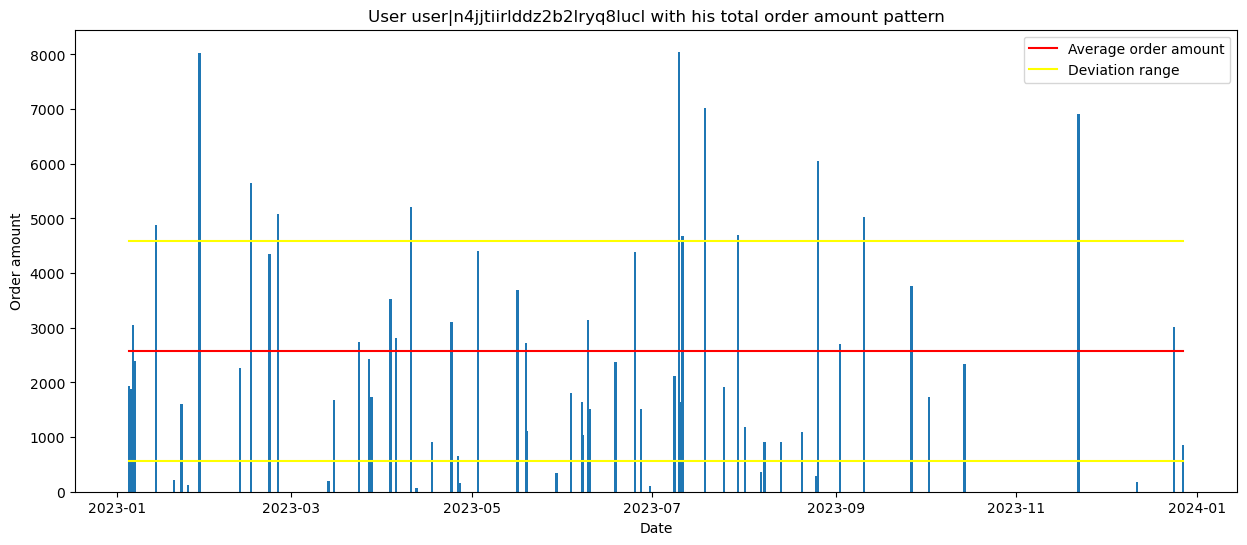

In [31]:
df.plot_user_order_amount('user|n4jjtiirlddz2b2lryq8lucl',1)

##### 5.3.1.2. Suspicious order amount for the user

In [32]:
df.user_order_amount_susp('user|n4jjtiirlddz2b2lryq8lucl',2)

,created_at,order_id,order_amount
83,2023-01-29 01:14:43,c735b37b-f6ad-43f4-82c5-d92489661cf7,8026.08
528,2023-07-10 00:58:42,2ca7daaf-1e40-41fd-bdad-e73612d592c4,8050.11
561,2023-07-18 22:00:12,11eddf61-2823-49e2-b2d2-aed78af67dd8,7012.80
878,2023-11-22 03:06:11,31f4c184-7875-452f-81bf-0be36ab6b8be,6917.04


#### 5.3.2. Suspicious circular trading

In [33]:
df.susp_circ()

,user_id,isin,date,order_type,order_amount
0,user|2vo2lu6gm28yawaihjf9qius,LU86746320721,2023-01-03,BUY,4067.2
1,user|2vo2lu6gm28yawaihjf9qius,LU86746320721,2023-01-03,SELL,3961.0


#### 5.3.3. Frequency of transactions for one user

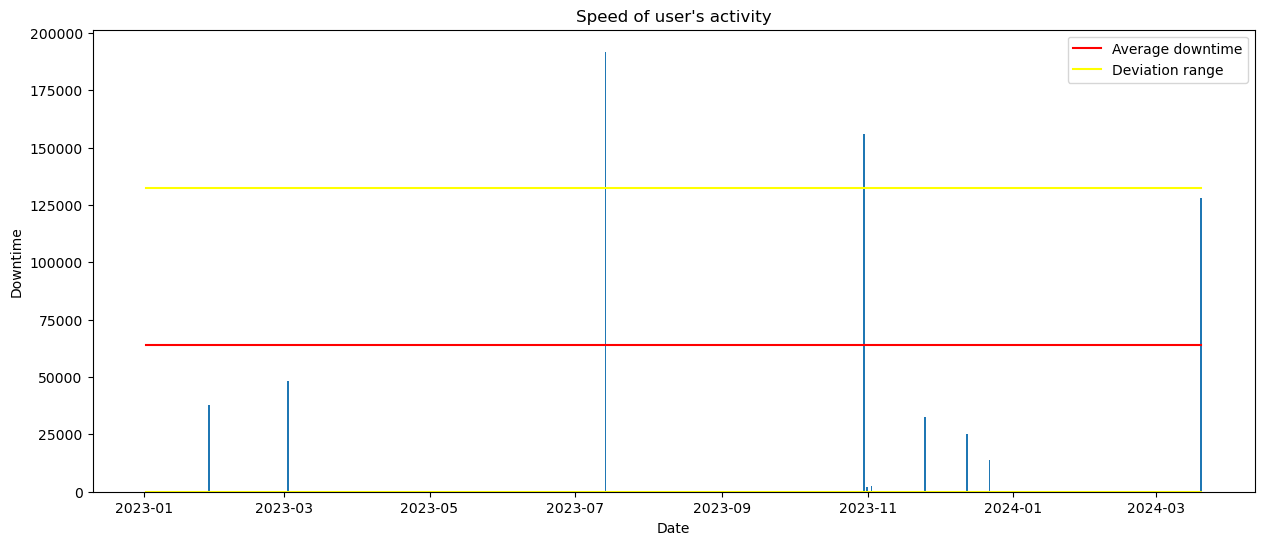

In [34]:
df.plot_activity_increase_user('user|57f4lb88pr59ukwzm8gpp2c5', 1)

#### 5.3.4. For one user we could find his own dependence of suspicious increase in activity on deviation factor...